<a href="https://colab.research.google.com/github/flatlalejo1982/Phase-4-Project-Execution/blob/Johan_AQI/Phase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Phase 4 Project Execution**

In [1]:
#Load core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1.Data Preparation**

In [2]:
import pandas as pd

#Load Data

data = pd.read_csv("/content/airdata.csv", sep = ",")
data.head()

,date,Station code,Address,Latitude,Longitude,SO2,NO2,CO,O3,PM2.5,PM10
0,1/1/2017 0:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.059,1.2,0.0525,57,73
1,1/1/2017 1:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.058,1.2,0.0525,59,71
2,1/1/2017 2:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,59,70
3,1/1/2017 3:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,58,70
4,1/1/2017 4:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.03,0.051,1.2,0.0525,61,69


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155405 entries, 0 to 155404
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          155405 non-null  object 
 1   Station code  155405 non-null  int64  
 2   Address       155405 non-null  object 
 3   Latitude      155405 non-null  float64
 4   Longitude     155405 non-null  float64
 5   SO2           155405 non-null  float64
 6   NO2           155405 non-null  float64
 7   CO            155405 non-null  float64
 8   O3            155405 non-null  float64
 9   PM2.5         155405 non-null  int64  
 10  PM10          155405 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 13.0+ MB


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

**Calculation of the Air Quality Index (AQI) for various pollutants**




**Define the EPA ranges (in µg/m³ or ppm depending on the contaminant)**

In [5]:
#Create EPA range table
rangos = {
    "SO2": pd.DataFrame({
        'Bmin': [0, 36, 76, 186, 305, 605],
        'Bmax': [35, 75, 185, 304, 604, 1004],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "NO2": pd.DataFrame({
        'Bmin': [0, 54, 101, 361, 650, 1250],
        'Bmax': [53, 100, 360, 649, 1249, 2049],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "CO": pd.DataFrame({
        'Bmin': [0.0, 4.5, 9.5, 12.5, 15.5, 30.5],
        'Bmax': [4.4, 9.4, 12.4, 15.4, 30.4, 50.4],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "O3": pd.DataFrame({
        'Bmin': [0.000, 0.055, 0.071, 0.086, 0.106, 0.201],
        'Bmax': [0.054, 0.070, 0.085, 0.105, 0.200, 0.604],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "PM2.5": pd.DataFrame({
        'Bmin': [0.0, 12.1, 35.5, 55.5, 150.5, 250.5],
        'Bmax': [12.0, 35.4, 55.4, 150.4, 250.4, 500.4],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "PM10": pd.DataFrame({
        'Bmin': [0, 55, 155, 255, 355, 425],
        'Bmax': [54, 154, 254, 354, 424, 604],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
}

def calcular_aqi(Cp, contaminante):
    tabla = rangos[contaminante]
    for _, r in tabla.iterrows():
        if r.Bmin <= Cp <= r.Bmax:
            AQI = ((r.Imax - r.Imin) / (r.Bmax - r.Bmin)) * (Cp - r.Bmin) + r.Imin
            return round(AQI, 1), r.Categoria
    return None, "Fuera de rango"


In [6]:
# Calcular AQI para cada particula contaminante registrada
for contaminante in ["SO2", "NO2", "CO", "O3", "PM2.5", "PM10"]:
    data[f"AQI_{contaminante}"], data[f"Cat_{contaminante}"] = zip(*data[contaminante].apply(lambda x: calcular_aqi(x, contaminante)))

In [7]:
#  Total AQI and dominant pollutant.
aqi_cols = [f"AQI_{c}" for c in ["SO2", "NO2", "CO", "O3", "PM2.5", "PM10"]]
data["AQI_Total"] = data[aqi_cols].max(axis=1)
data["Dominante"] = data[aqi_cols].idxmax(axis=1).str.replace("AQI_", "")

In [8]:
# --- FUNCTION FOR CATEGORIZING THE TOTAL AQI ---
def categoria_aqi_total(aqi):
    if 0 <= aqi <= 50:
        return "Good"
    elif 51 <= aqi <= 100:
        return "Moderate"
    elif 101 <= aqi <= 150:
        return "Harmful/sensitive Groups"
    elif 151 <= aqi <= 200:
        return "Poor"
    elif 201 <= aqi <= 300:
        return "Very Poor"
    elif 301 <= aqi <= 500:
        return "Dangerous"
    else:
        return "Fuera de rango"

In [9]:
# --- ADD TOTAL AQI CATEGORY ---
data["Categoria_Total"] = data["AQI_Total"].apply(categoria_aqi_total)

In [10]:
# Show results
print("\n Resultados del cálculo del AQI:")
display(data.head())


 Resultados del cálculo del AQI:


,date,Station code,Address,Latitude,Longitude,SO2,NO2,CO,O3,PM2.5,...,Cat_CO,AQI_O3,Cat_O3,AQI_PM2.5,Cat_PM2.5,AQI_PM10,Cat_PM10,AQI_Total,Dominante,Categoria_Total
0,1/1/2017 0:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.059,1.2,0.0525,57,...,Good,48.6,Good,151.8,Poor,59.9,Moderate,151.8,PM2.5,Poor
1,1/1/2017 1:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.058,1.2,0.0525,59,...,Good,48.6,Good,152.8,Poor,58.9,Moderate,152.8,PM2.5,Poor
2,1/1/2017 2:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,59,...,Good,48.6,Good,152.8,Poor,58.4,Moderate,152.8,PM2.5,Poor
3,1/1/2017 3:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,58,...,Good,48.6,Good,152.3,Poor,58.4,Moderate,152.3,PM2.5,Poor
4,1/1/2017 4:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.03,0.051,1.2,0.0525,61,...,Good,48.6,Good,153.8,Poor,57.9,Moderate,153.8,PM2.5,Poor


In [11]:
# Save to a new file and download the file
data.to_csv("airdata_AQI_resultados.csv", index=False)
print("\n Archivo guardado como: airdata_AQI_resultados.csv")


 Archivo guardado como: airdata_AQI_resultados.csv


In [12]:
data.loc[:, 'SO2':].describe()

,SO2,NO2,CO,O3,PM2.5,PM10,AQI_SO2,AQI_NO2,AQI_CO,AQI_O3,AQI_PM2.5,AQI_PM10,AQI_Total
count,155405.000000,155405.000000,155405.000000,155405.000000,155405.000000,155405.000000,155405.000000,155405.000000,155405.000000,142162.000000,155405.000000,155405.000000,155405.000000
mean,0.040914,0.069994,3.320786,0.252405,60.506097,88.594588,0.057594,0.053532,37.729360,269.236002,146.271129,67.065316,275.436717
std,0.032468,0.052109,0.619453,0.191296,14.957956,27.368936,0.064461,0.069233,7.030477,132.113738,21.118301,14.522713,107.770128
min,0.010000,0.020000,1.000000,0.040000,30.000000,41.000000,0.000000,0.000000,11.400000,37.000000,88.600000,38.000000,88.600000
25%,0.030000,0.029000,3.300000,0.090000,54.000000,67.000000,0.000000,0.000000,37.500000,187.100000,146.600000,56.900000,161.100000
50%,0.040000,0.045000,3.400000,0.220000,62.000000,96.000000,0.100000,0.000000,38.600000,305.400000,154.400000,71.300000,289.500000
75%,0.050000,0.100000,3.600000,0.350000,70.000000,108.000000,0.100000,0.100000,40.900000,364.700000,158.500000,77.200000,359.800000
max,4.060000,0.248000,12.300000,3.680000,280.000000,348.000000,5.800000,0.200000,148.300000,498.000000,324.500000,197.000000,498.000000


Plot the AQI Numerical


--- Generating Histograms with KDE for Numerical Variables (Side-by-Side) ---


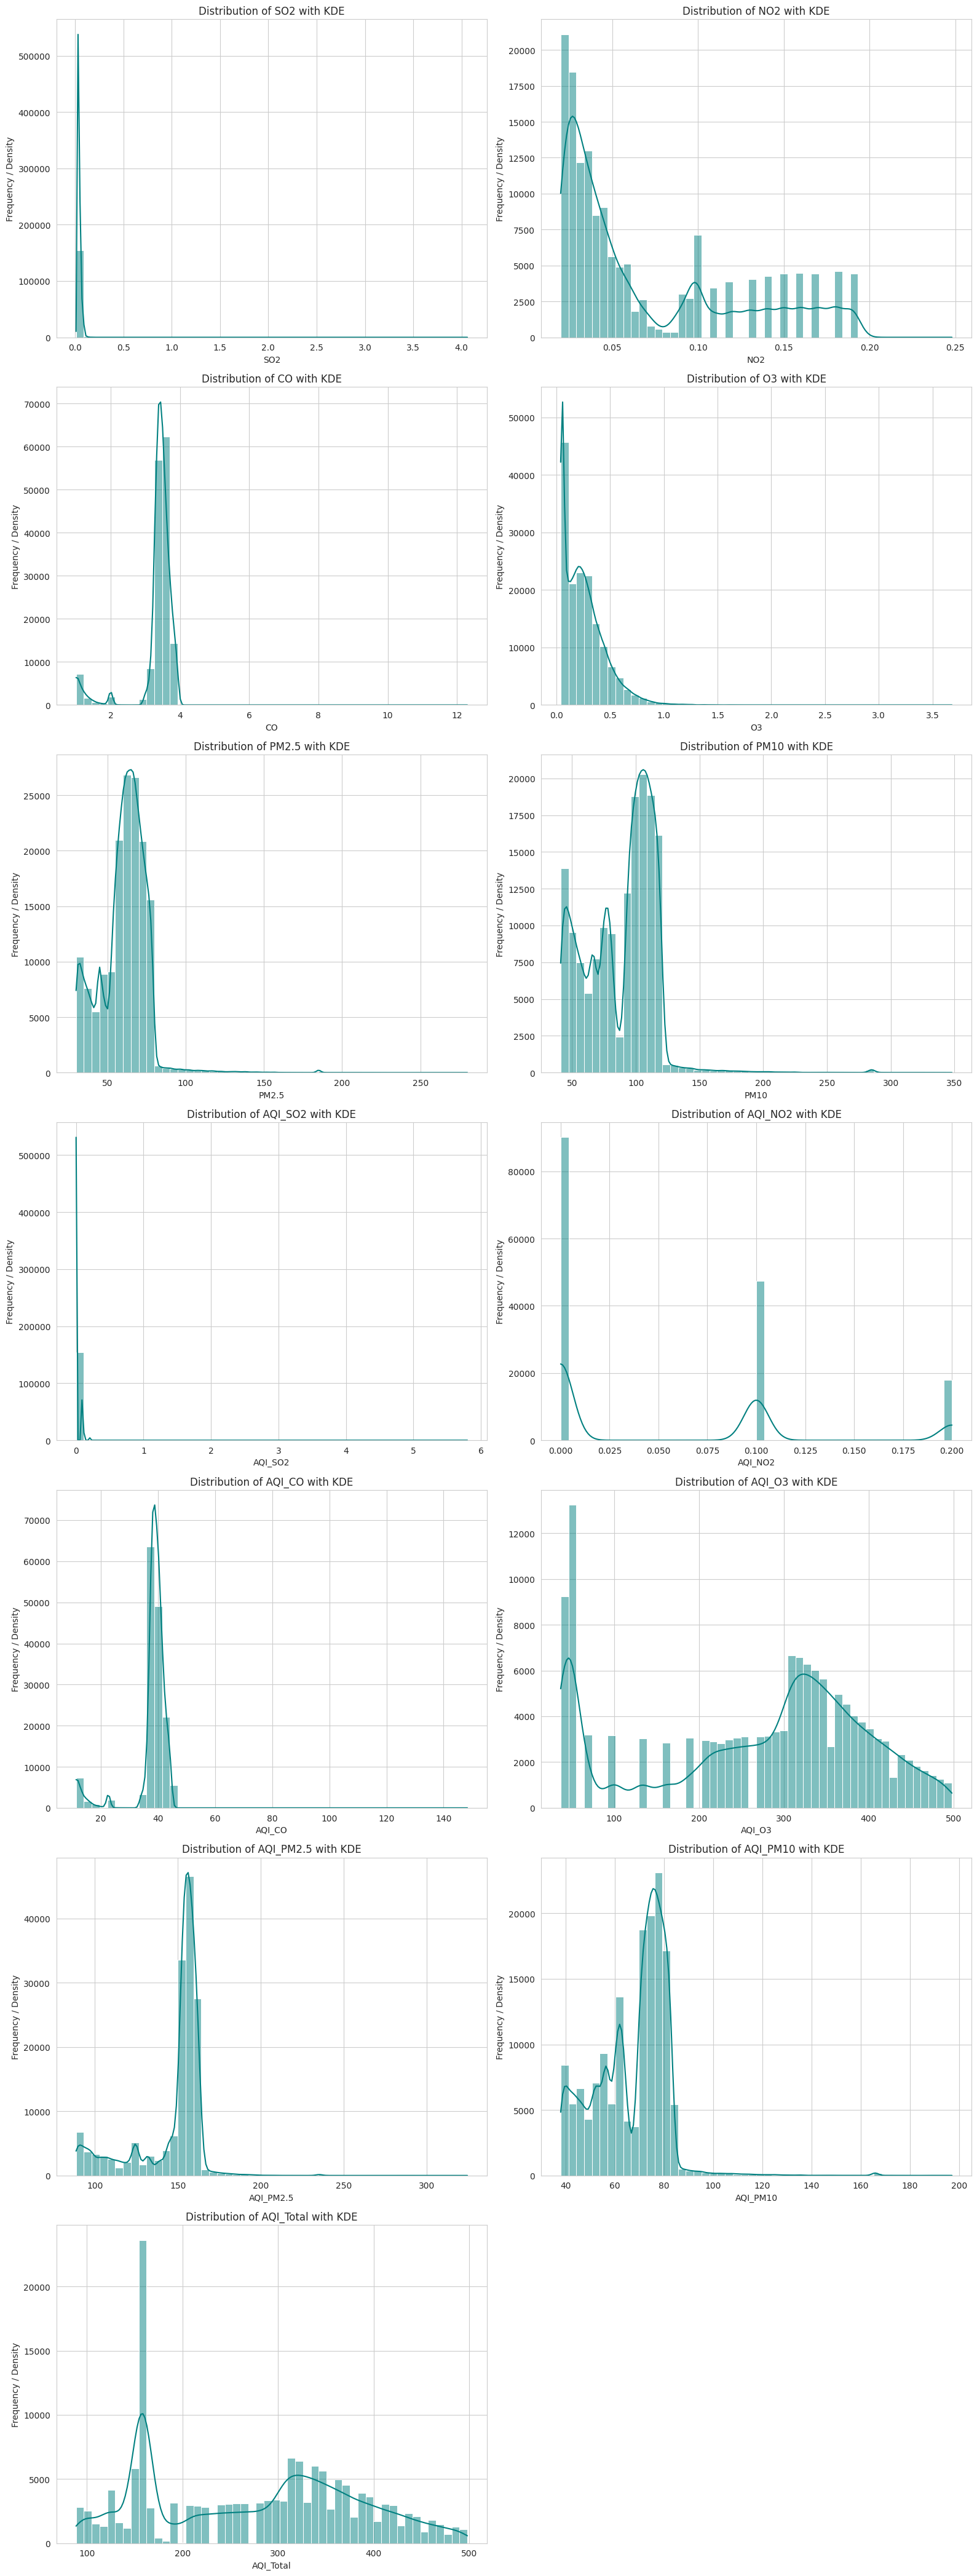

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("whitegrid")

# --- Plots for Numerical Variables (Histogram with KDE) ---
print("\n--- Generating Histograms with KDE for Numerical Variables (Side-by-Side) ---")

numerical_cols_for_kde = [
    'SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10',
    'AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3', 'AQI_PM2.5', 'AQI_PM10', 'AQI_Total'
]

# Determine the number of rows needed for a two-column layout
num_cols_per_row = 2
num_plots = len(numerical_cols_for_kde)
num_rows = math.ceil(num_plots / num_cols_per_row)

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(16, 6 * num_rows))
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, col in enumerate(numerical_cols_for_kde):
    sns.histplot(data=data, x=col, kde=True, bins=50, color='teal', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} with KDE')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency / Density')

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

Plot the variable categorical

Generating countplots for the following categorical columns: ['Cat_SO2', 'Cat_NO2', 'Cat_CO', 'Cat_O3', 'Cat_PM2.5', 'Cat_PM10', 'Categoria_Total'] (Side-by-Side)


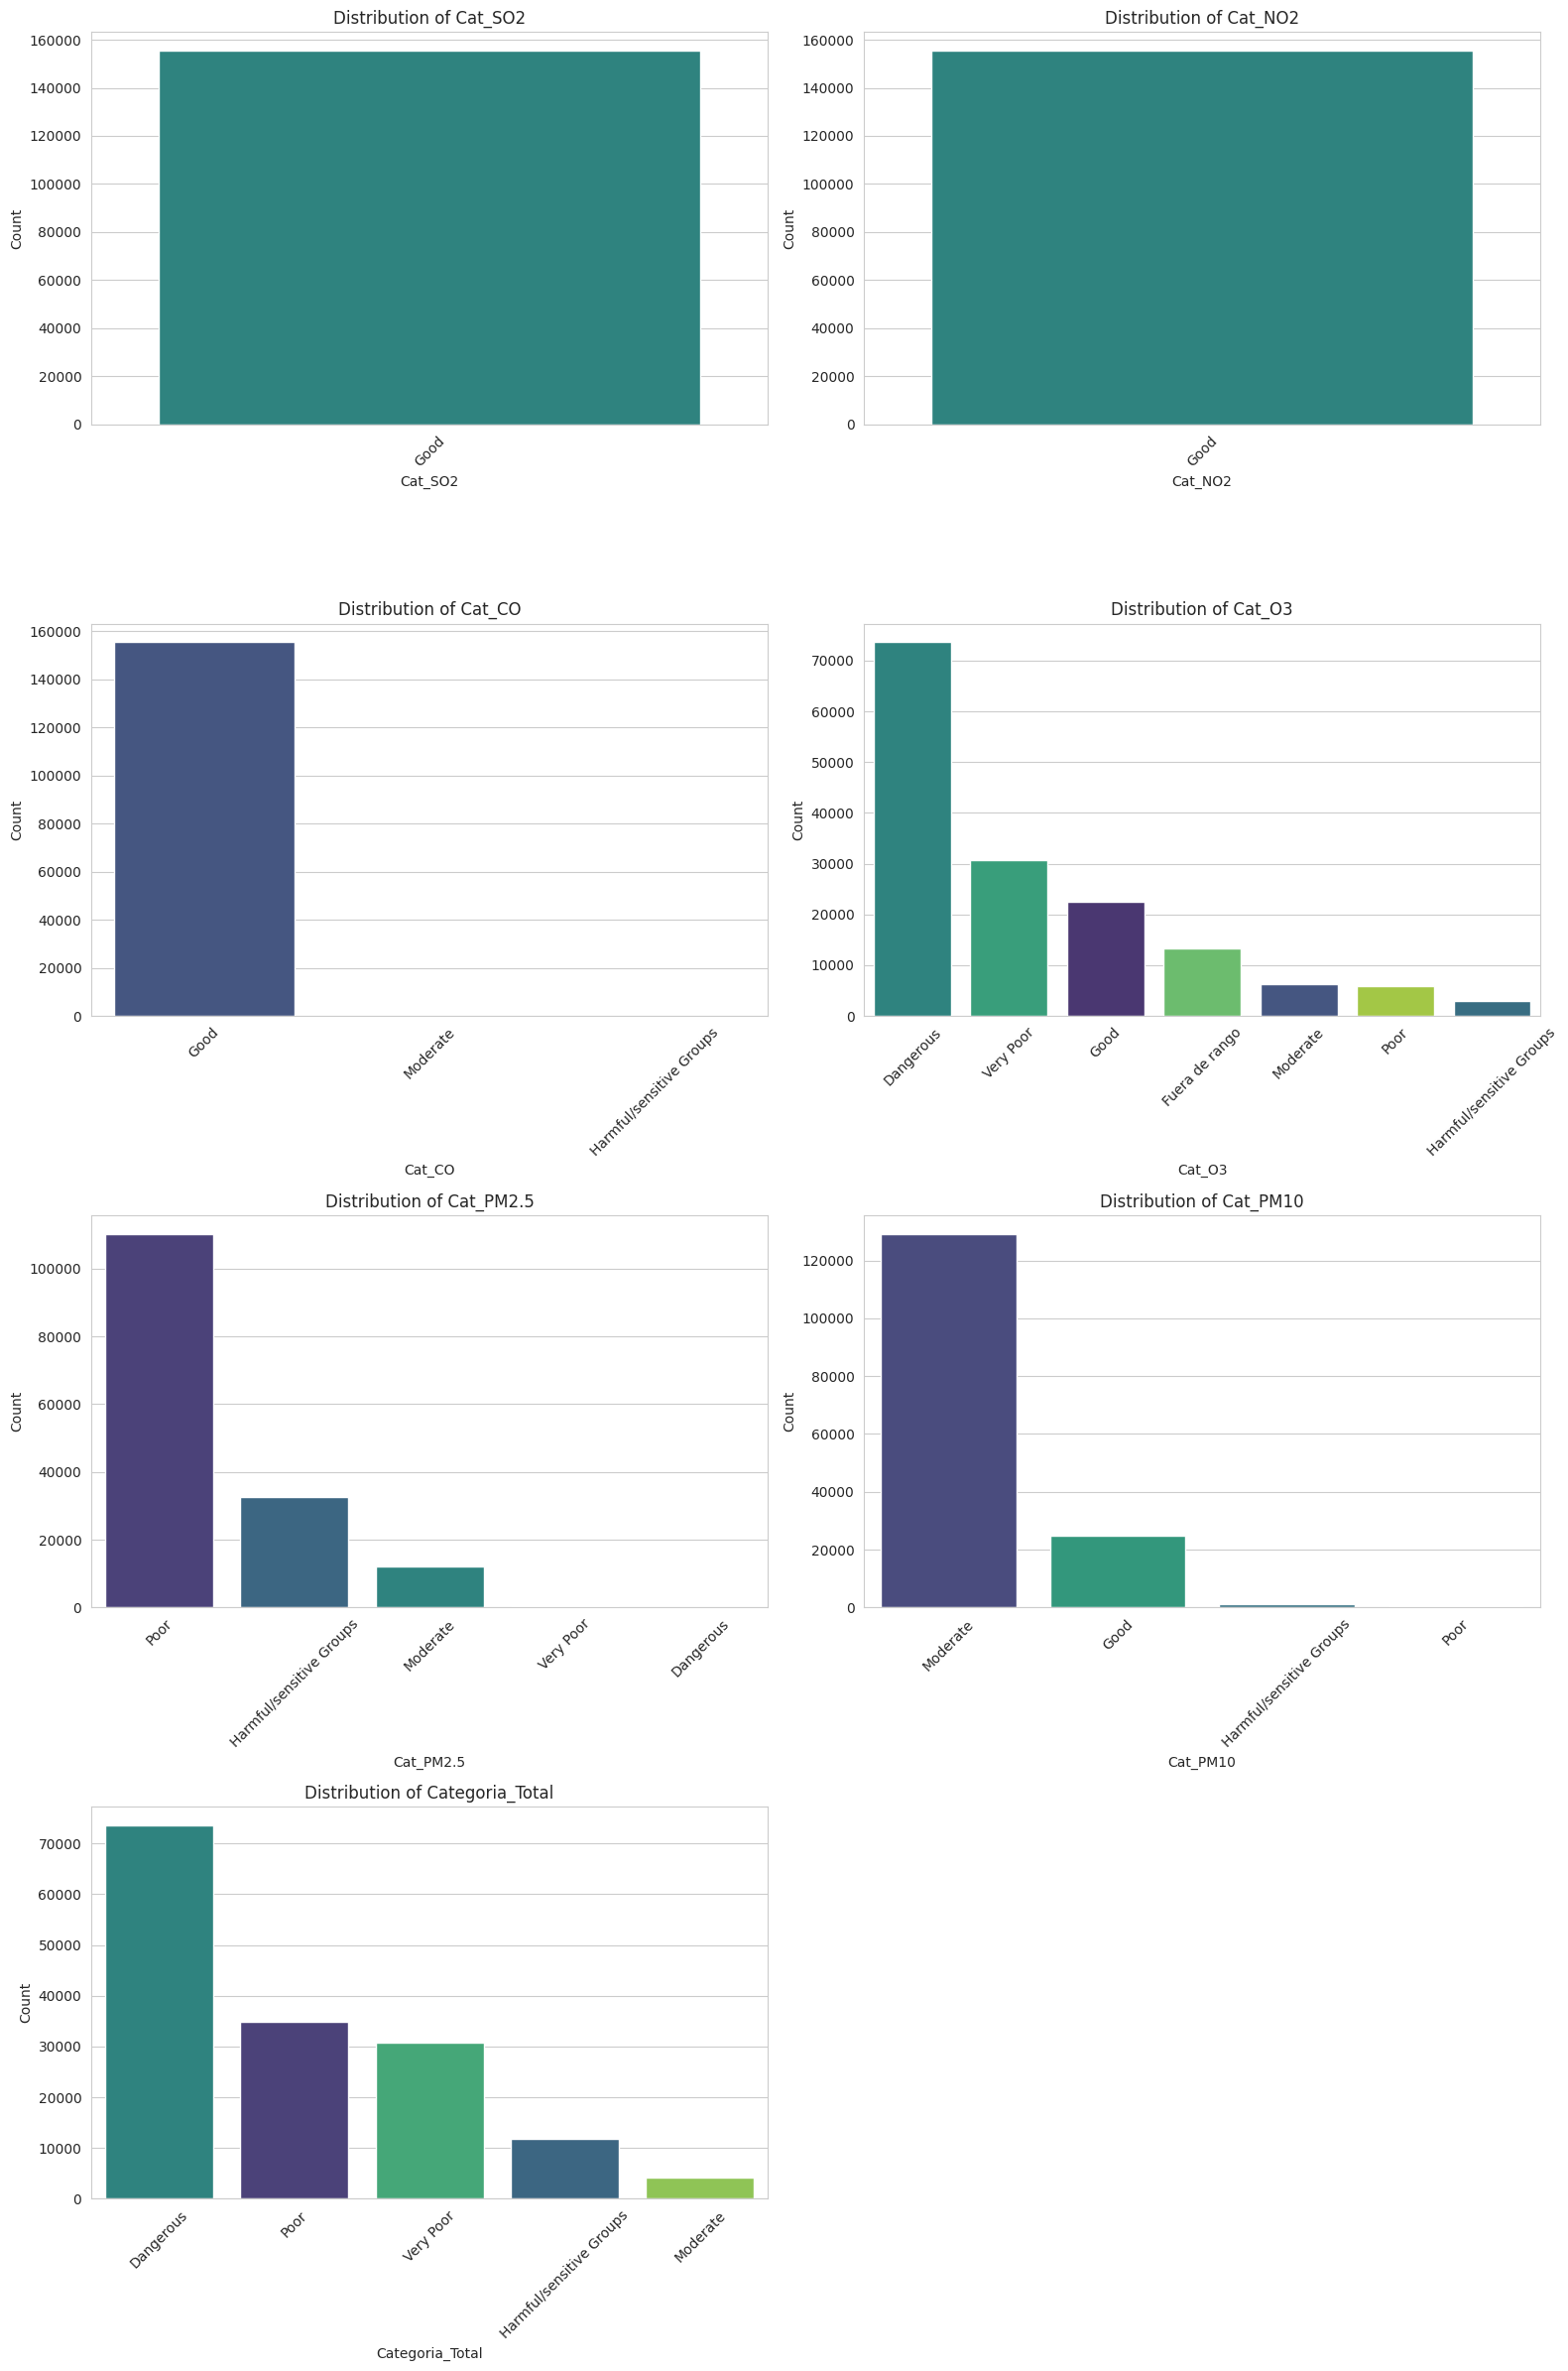

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("whitegrid")

categorical_cols = [
    'Cat_SO2', 'Cat_NO2', 'Cat_CO', 'Cat_O3', 'Cat_PM2.5', 'Cat_PM10', 'Categoria_Total'
]

print(f"Generating countplots for the following categorical columns: {categorical_cols} (Side-by-Side)")

# Determine the number of rows needed for a two-column layout
num_cols_per_row = 2
num_plots = len(categorical_cols)
num_rows = math.ceil(num_plots / num_cols_per_row)

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(16, 6 * num_rows))
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index, hue=col, legend=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45) # Removed 'ha="right"' to fix the ValueError

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

Diagram Boxplot to numerical values


--- Generating Boxplots for Numerical Variables (Side-by-Side) ---


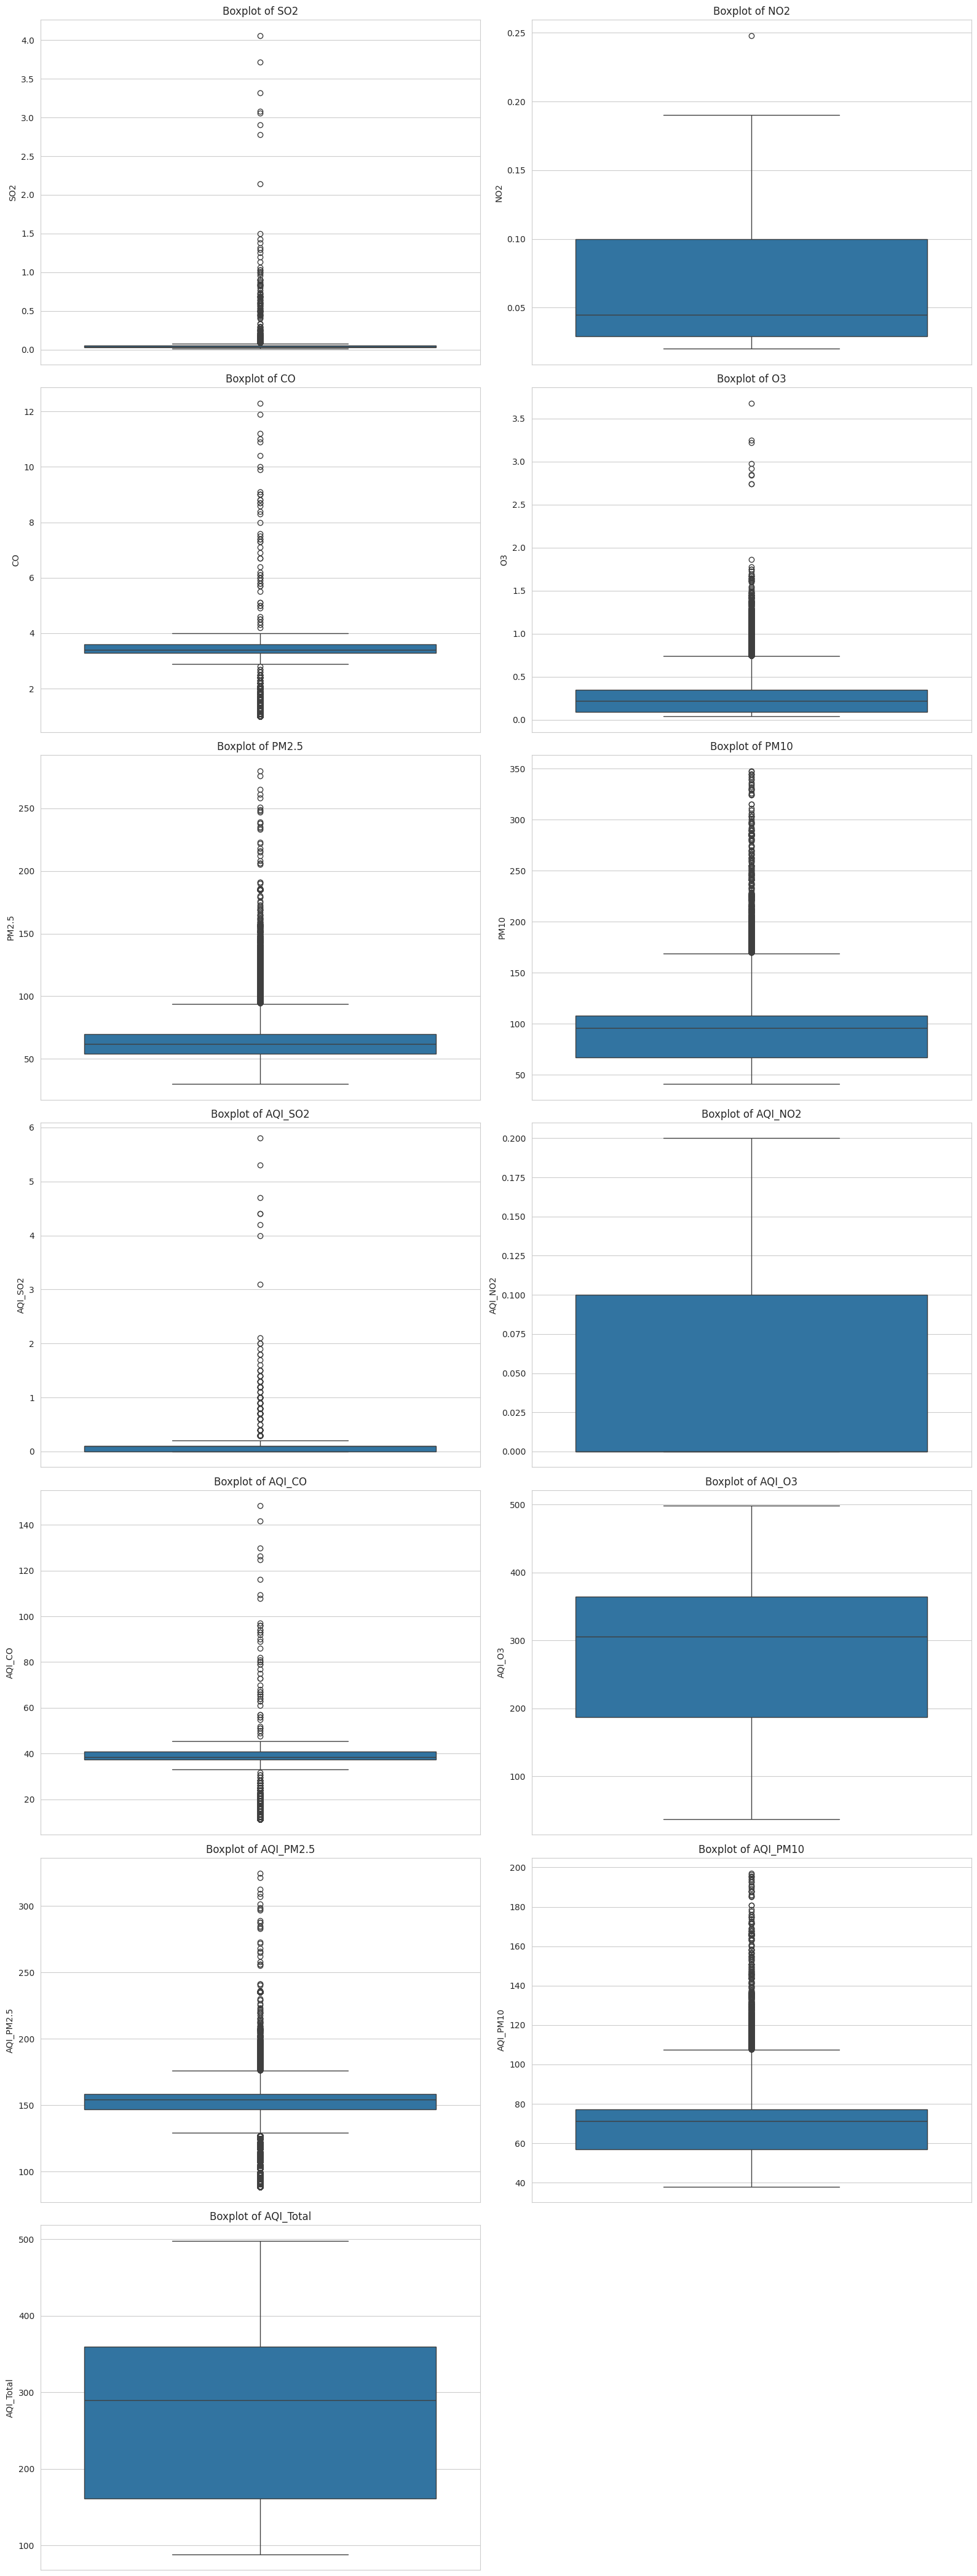

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("whitegrid")

# Define all numerical columns for boxplots
numerical_cols_for_boxplot = [
    'SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10',
    'AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3', 'AQI_PM2.5', 'AQI_PM10', 'AQI_Total'
]

print("\n--- Generating Boxplots for Numerical Variables (Side-by-Side) ---")

# Determine the number of rows needed for a two-column layout
num_cols_per_row = 2
num_plots = len(numerical_cols_for_boxplot)
num_rows = math.ceil(num_plots / num_cols_per_row)

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(16, 6 * num_rows))
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, col in enumerate(numerical_cols_for_boxplot):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

Building Decission Tree Regressor Models

We will now build a separate Decission Tree Regression model for each AQI variable (dependent variable) using its corresponding pollutant concentration (independent variable). This will help us understand the linear relationship and predict AQI based on pollutant levels.

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

dependent_var_total = 'AQI_Total'
independent_vars_total = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

print(f"\n--- Building DTR Model for {dependent_var_total} vs {independent_vars_total} ---")

# Select relevant columns and drop rows with NaN values for this specific model
temp_df_total = data[independent_vars_total + [dependent_var_total]].dropna()

if temp_df_total.empty:
    print(f"No data available for {dependent_var_total} and {independent_vars_total} after dropping NaNs. Skipping.")
else:
    X_total = temp_df_total[independent_vars_total]
    y_total = temp_df_total[dependent_var_total]

    # Split data into training and testing sets
    X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X_total, y_total, test_size=0.2, random_state=42)

    # Initialize and train the Decision Tree Regressor model
    dtr_model_total = DecisionTreeRegressor(random_state=42)
    dtr_model_total.fit(X_train_total, y_train_total)

    # Make predictions
    y_pred_total = dtr_model_total.predict(X_test_total)

    # Evaluate the model
    mse_total = mean_squared_error(y_test_total, y_pred_total)
    rmse_total = np.sqrt(mse_total)
    mae_total = mean_absolute_error(y_test_total, y_pred_total)
    r2_total = r2_score(y_test_total, y_pred_total)

    # Store and print results
    print(f"Dependent Variable: {dependent_var_total}")
    print(f"Independent Variables: {independent_vars_total}")
    print(f"Mean Squared Error (MSE): {mse_total:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_total:.4f}")
    print(f"Mean Absolute Error (MAE): {mae_total:.4f}")
    print(f"R-squared: {r2_total:.4f}")


--- Building DTR Model for AQI_Total vs ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10'] ---
Dependent Variable: AQI_Total
Independent Variables: ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']
Mean Squared Error (MSE): 0.2725
Root Mean Squared Error (RMSE): 0.5220
Mean Absolute Error (MAE): 0.0077
R-squared: 1.0000


Building a Graph DTR Numerical value predicted

--- Visualizing Decision Tree Regressor Model for AQI_Total ---


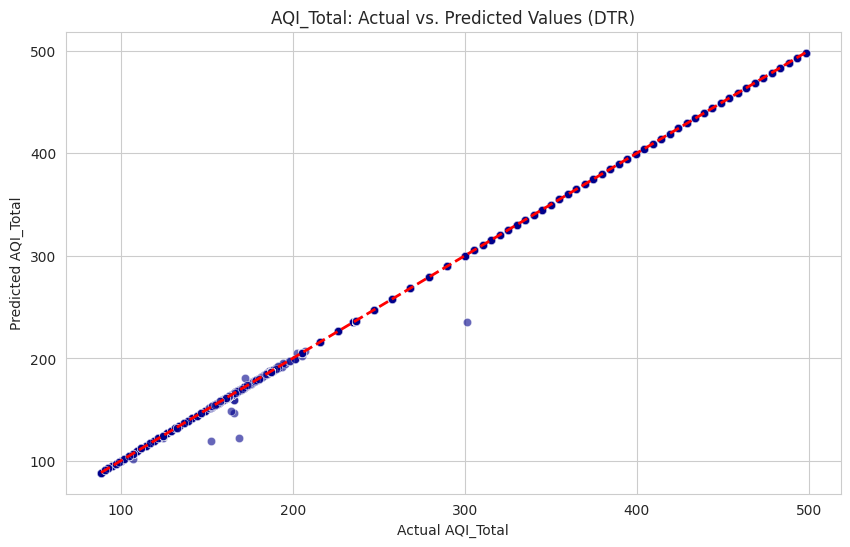

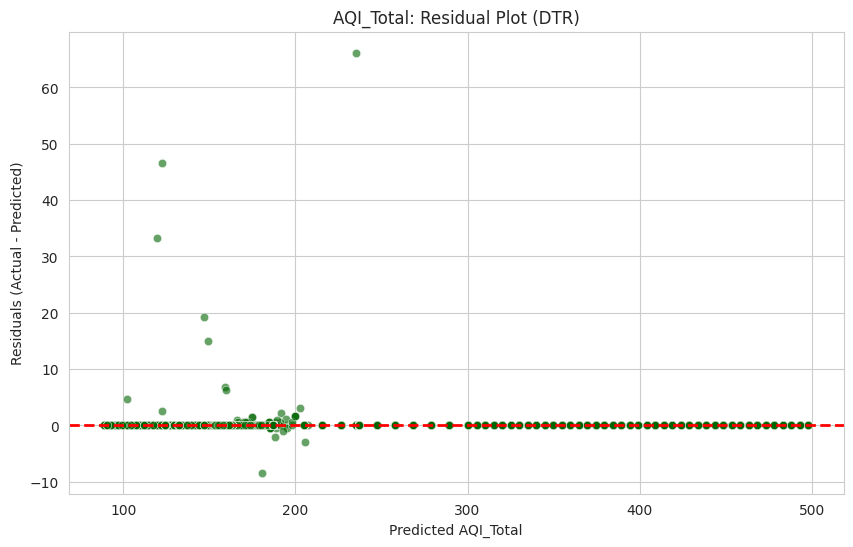

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

# Assuming dtr_model_total, X_test_total, y_test_total, y_pred_total are available from previous execution
# If not, please re-run the DTR model cell (G0Pn3tNnOdsn)

# Ensure the model and test data are available
if 'dtr_model_total' not in locals() or 'y_test_total' not in locals() or 'y_pred_total' not in locals():
    print("DTR model, test data, or predictions are not available. Please run the DTR model cell first.")
else:
    print("--- Visualizing Decision Tree Regressor Model for AQI_Total ---")

    # Calculate residuals
    residuals = y_test_total - y_pred_total

    # Plot 1: Actual vs. Predicted Values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test_total, y=y_pred_total, alpha=0.6, color='darkblue')
    plt.plot([y_test_total.min(), y_test_total.max()], [y_test_total.min(), y_test_total.max()], 'r--', lw=2) # 45-degree line
    plt.title('AQI_Total: Actual vs. Predicted Values (DTR)')
    plt.xlabel('Actual AQI_Total')
    plt.ylabel('Predicted AQI_Total')
    plt.show()

    # Plot 2: Residual Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred_total, y=residuals, alpha=0.6, color='darkgreen')
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.title('AQI_Total: Residual Plot (DTR)')
    plt.xlabel('Predicted AQI_Total')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.show()

Diagnostic with distibution of the residuals

--- Generating QQ Plot of Residuals for DTR Model ---


<Figure size 800x600 with 0 Axes>

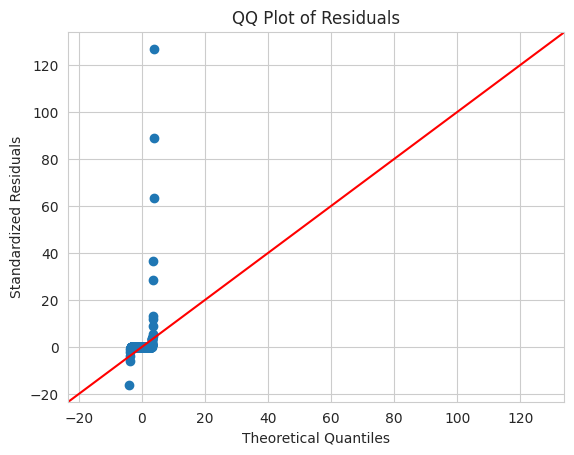

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_style("whitegrid")

# Assuming residuals from the DTR model are available
# If not, please ensure the DTR model cell (G0Pn3tNnOdsn) and its visualization cell (f44fafa6) have been run

if 'residuals' not in locals():
    print("Residuals are not available. Please run the DTR model training and visualization cells first.")
else:
    print("--- Generating QQ Plot of Residuals for DTR Model ---")

    plt.figure(figsize=(8, 6))
    sm.qqplot(residuals, line='45', fit=True)
    plt.title('QQ Plot of Residuals')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Standardized Residuals')
    plt.show()

Building Random Forest Regressor Models

We will now build a separate Random Forest Regressor Regressor model Categoria Total (dependent variable) using its corresponding pollutant concentration (independent variable). This will help us understand the linear relationship and predict AQI based on pollutant levels.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np

# Define the single dependent category variable
dependent_category_var_target = 'Categoria_Total'
# Define all independent pollutant variables
independent_vars = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

print(f"### Building Random Forest Classifier Model for {dependent_category_var_target} using all pollutants ###")

# Select relevant columns and drop rows with NaN values for this specific model
temp_df = data[independent_vars + [dependent_category_var_target]].dropna()

if temp_df.empty:
    print(f"No data available for {dependent_category_var_target} and {independent_vars} after dropping NaNs. Skipping.")
else:
    X = temp_df[independent_vars]
    y = temp_df[dependent_category_var_target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Check if there's only one class in the training data
    if len(y_train.unique()) < 2:
        print(f"Skipping model for {dependent_category_var_target}: Only one class present in training data after splitting. Cannot train a classifier.")
    else:
        # Initialize and train the Random Forest Classifier model
        rfc_model_consolidated = RandomForestClassifier(random_state=42)
        rfc_model_consolidated.fit(X_train, y_train)

        # Make predictions
        y_pred_consolidated = rfc_model_consolidated.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred_consolidated)
        precision = precision_score(y_test, y_pred_consolidated, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred_consolidated, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred_consolidated, average='weighted', zero_division=0)

        # Print results
        print(f"\n--- Results for Random Forest Classifier predicting {dependent_category_var_target} ---")
        print(f"Independent Variables: {independent_vars}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision (weighted): {precision:.4f}")
        print(f"Recall (weighted): {recall:.4f}")
        print(f"F1-Score (weighted): {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred_consolidated, zero_division=0))


### Building Random Forest Classifier Model for Categoria_Total using all pollutants ###

--- Results for Random Forest Classifier predicting Categoria_Total ---
Independent Variables: ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']
Accuracy: 0.9998
Precision (weighted): 0.9998
Recall (weighted): 0.9998
F1-Score (weighted): 0.9998

Classification Report:
                          precision    recall  f1-score   support

               Dangerous       1.00      1.00      1.00     14790
Harmful/sensitive Groups       1.00      1.00      1.00      2415
                Moderate       1.00      1.00      1.00       803
                    Poor       1.00      1.00      1.00      6994
               Very Poor       1.00      1.00      1.00      6079

                accuracy                           1.00     31081
               macro avg       1.00      1.00      1.00     31081
            weighted avg       1.00      1.00      1.00     31081




--- Generating Confusion Matrix for Random Forest Classifier ---


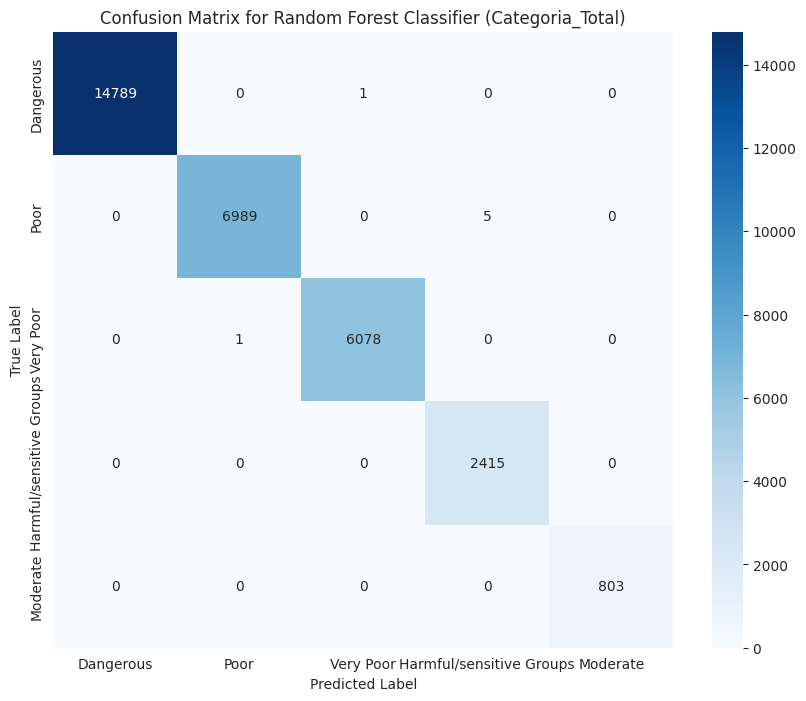

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Ensure y_test and y_pred_consolidated are available from the RFC model execution
if 'y_test' not in locals() or 'y_pred_consolidated' not in locals():
    print("RFC model test data or predictions are not available. Please run the RFC model cell first.")
else:
    print("\n--- Generating Confusion Matrix for Random Forest Classifier ---")

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred_consolidated, labels=y_test.unique())

    # Get class labels for better readability
    class_labels = y_test.unique()

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for Random Forest Classifier (Categoria_Total)')
    plt.show()